# # Table of Contents


1. [Importing Libraies](#1)
 
2.  [Extracting Files](#2)

     2.1 [ Setting Path](#2.1)
     
3.  [Making Data Frame](#3)

4.  [Data Distribution](#4)

      4.1 [Displaying Images of Cat](#4.1)
      
      4.2  [Displaying Images of Dog](#4.2)
      
5. [Siplitting The Data](#5)

    5.1  [Image Data Generator](#5.1)
    
6. [Making CNN Model](#6)

    6.1  [Displaying the model](#6.1)


7 [Training of Model Model](#7)




     


# **Classification Basic CNN.**


In this notebook, classify images of dog and cat by building a simple Neural Network.

What we will learn:

* Load the images.

* Visulaise the Data distribution of all data.

* Visualizing some of the images
 
* Making The CNN Network

* Use Image Data Generator

* Graph the training loss and validation loss

* Predict the results

* Confusion Matrix

<a id="1"></a> <br>
# 1. Importing Libraries

We are Importing Libraries.

* Libraries which need for

* Image Processing

* Data visualization

*  Making Model Architecture.



In [3]:
''' importing library''' 

import glob
from keras.preprocessing.image import ImageDataGenerator
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d
from PIL import Image
import seaborn as sns; sns.set_theme()
from scipy import stats
import random
from collections import deque 
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from joblib import Parallel, delayed
from scipy.stats import f_oneway
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from matplotlib.patches import Patch
from keras.datasets import mnist
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.autolayout"] = True
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
from joblib import Parallel, delayed
from scipy.stats import f_oneway
import sys
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.image as img

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Settings seed

In [4]:
'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

<a id="2.1"></a> <br>
# 2.1 Setting Path

* Setting the path and Image size 

In [5]:
IMAGE_FOLDER_PATH = "../dogs_vs_cats/train"
FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
WIDTH = 150
HEIGHT = 150

In [6]:
FILE_NAMES[0:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [7]:
labels = []
for i in os.listdir(IMAGE_FOLDER_PATH):
    labels+=[i]

<a id="3"></a> <br>
# 3 Making Data Frame

In [8]:
# empty list
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILE_NAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_FOLDER_PATH, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [9]:
dataset.head(10)

,image_path,target
0,../dogs_vs_cats/train\cat.0.jpg,cat
1,../dogs_vs_cats/train\cat.1.jpg,cat
2,../dogs_vs_cats/train\cat.10.jpg,cat
3,../dogs_vs_cats/train\cat.100.jpg,cat
4,../dogs_vs_cats/train\cat.1000.jpg,cat
5,../dogs_vs_cats/train\cat.10000.jpg,cat
6,../dogs_vs_cats/train\cat.10001.jpg,cat
7,../dogs_vs_cats/train\cat.10002.jpg,cat
8,../dogs_vs_cats/train\cat.10003.jpg,cat
9,../dogs_vs_cats/train\cat.10004.jpg,cat


In [10]:
print("total data counts:", dataset['target'].count())
counts = dataset['target'].value_counts()
print(counts)

total data counts: 17445
cat    12500
dog     4945
Name: target, dtype: int64


<a id="4"></a> <br>
# 4 Data Distributation

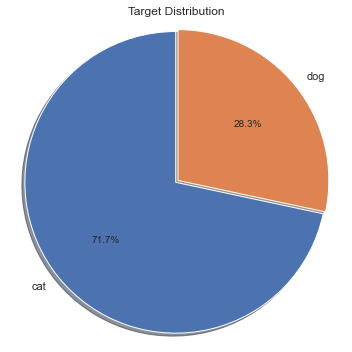

In [11]:
label_count=dataset['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

<a id="4.1"></a> <br>
# 4.1 Displaying Images of Cat

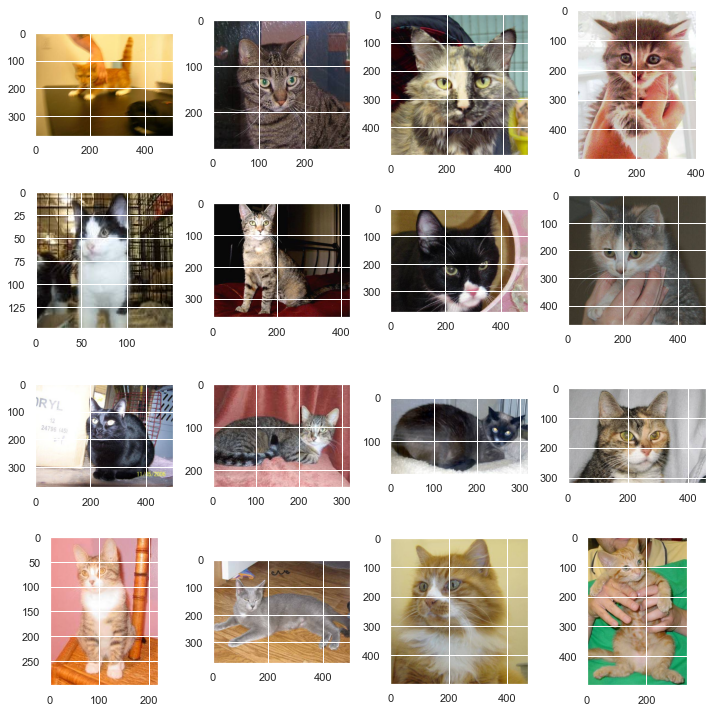

In [13]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_cats_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

<a id="4.2"></a> <br>
# 4.2 Displaying Images of Dog

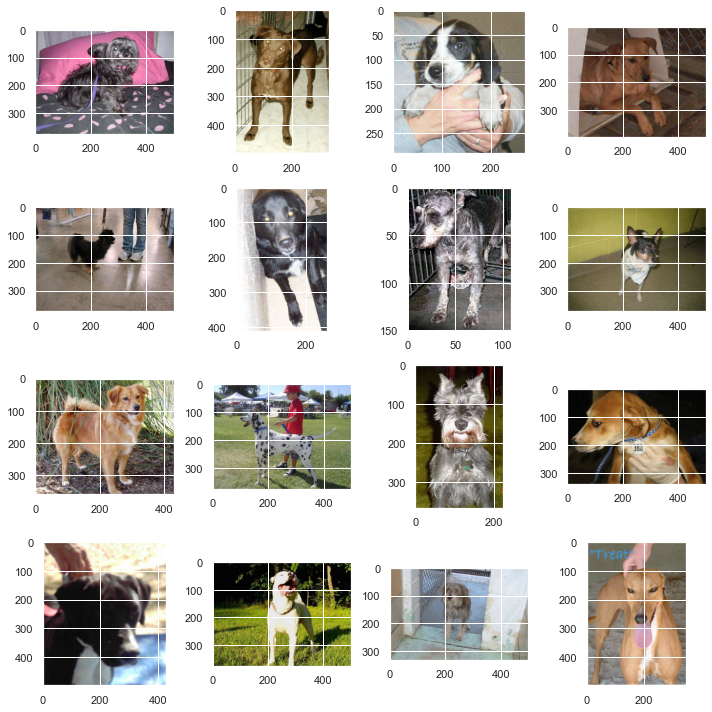

In [14]:
rows = 4
cols = 4
axes = []
fig=plt.figure(figsize=(10,10))
i = 0

for a in range(rows*cols):
    b = img.imread(train_dogs_dir[i])
    axes.append(fig.add_subplot(rows,cols,a+1))
    plt.imshow(b)
    i+=1
fig.tight_layout()
plt.show()

<a id="5"></a> <br>
# 5 Splitting The data

In [15]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state=seed)

# **Data Distributaion Visulatization**

In [ ]:
class_id_distributionTrain = dataset_train['target'].value_counts()
class_id_distributionTrain.head(10)

cat    10004
dog     9996
Name: target, dtype: int64

<BarContainer object of 2 artists>

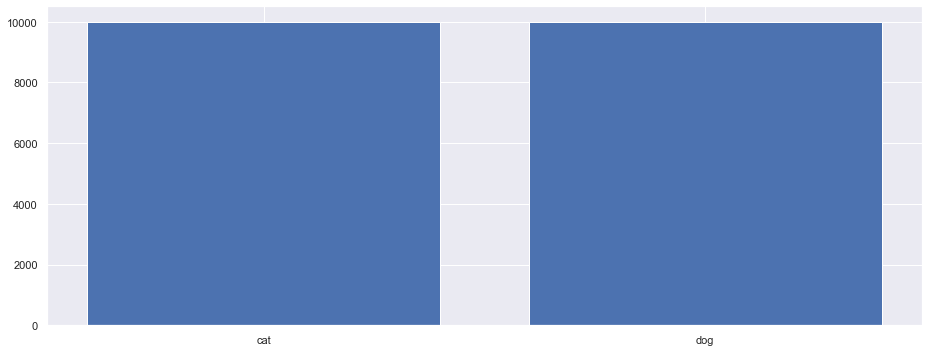

In [ ]:
plt.figure(figsize=(13,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distributionTrain.index, class_id_distributionTrain.values)

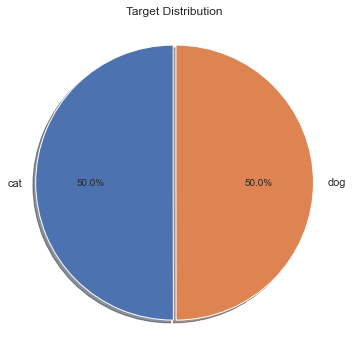

In [ ]:
label_count=dataset_train['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

In [ ]:
class_id_distributionTest = dataset_test['target'].value_counts()
class_id_distributionTest.head(10)

dog    2504
cat    2496
Name: target, dtype: int64

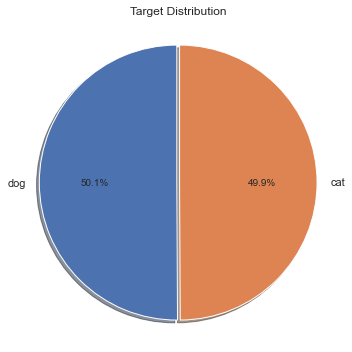

In [ ]:
label_count=dataset_test['target'].value_counts()
explode = (0.01,0.01)  

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(label_count.values, explode=explode, labels=label_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Target Distribution')
plt.show()

<a id="5.1"></a> <br>
# 5.1 Image DataGenerator

When there is little data to train, we have to use ImageDataGenerator to increase the number of data.
It is recommended to use only scaling for test data.

1. rescale = 1./255 : change the value between 0 and 1

2. rotation_range = 15 : Random rotation within 15 degrees

3. shear_range = 0.1 : shear range 10%

4. zoom_range = 0.2 : zoom range 20%

5. horizontal_flip = True : Randomly flip horizontally.

6. width_shift_range = 0.1 : Randomly move the original image horizontally within 10% of the width

7. height_shift_range=0.1 : Randomly move the original image vertically within 10% of the width


In [ ]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


<a id="6"></a> <br>
# 6 Making CNN Model

In [ ]:
model = Sequential() # implement model layer 
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(WIDTH, HEIGHT, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

<a id="6.1"></a> <br>
# 6.1 Displaying Model

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 flatten (Flatten)           (None, 341056)            0         
                                                                 
 dense (Dense)               (None, 128)               43655296  
                                                        

<a id="7"></a> <br>
# 7 Train The model

In [ ]:
History=model.fit(train_datagenerator,
                       epochs=87,
                       validation_data=test_datagenerator,
                       validation_steps=dataset_test.shape[0]/150,
                       steps_per_epoch=dataset_train.shape[0]/150)

Epoch 1/87
133/133 [==============================] - 200s 1s/step - loss: 0.8925 - accuracy: 0.5980 - val_loss: 0.5868 - val_accuracy: 0.6754
Epoch 2/87
133/133 [==============================] - 99s 745ms/step - loss: 0.5908 - accuracy: 0.6878 - val_loss: 0.5629 - val_accuracy: 0.7078
Epoch 3/87
133/133 [==============================] - 100s 747ms/step - loss: 0.5595 - accuracy: 0.7099 - val_loss: 0.5146 - val_accuracy: 0.7510
Epoch 4/87
133/133 [==============================] - 100s 748ms/step - loss: 0.5320 - accuracy: 0.7304 - val_loss: 0.5157 - val_accuracy: 0.7500
Epoch 5/87
133/133 [==============================] - 100s 746ms/step - loss: 0.5207 - accuracy: 0.7425 - val_loss: 0.5118 - val_accuracy: 0.7664
Epoch 6/87
133/133 [==============================] - 99s 743ms/step - loss: 0.5053 - accuracy: 0.7554 - val_loss: 0.4470 - val_accuracy: 0.7940
Epoch 7/87
133/133 [==============================] - 99s 743ms/step - loss: 0.4956 - accuracy: 0.7634 - val_loss: 0.4772 - val_a

<a id="8"></a> <br>
# 8 Plotting The Result

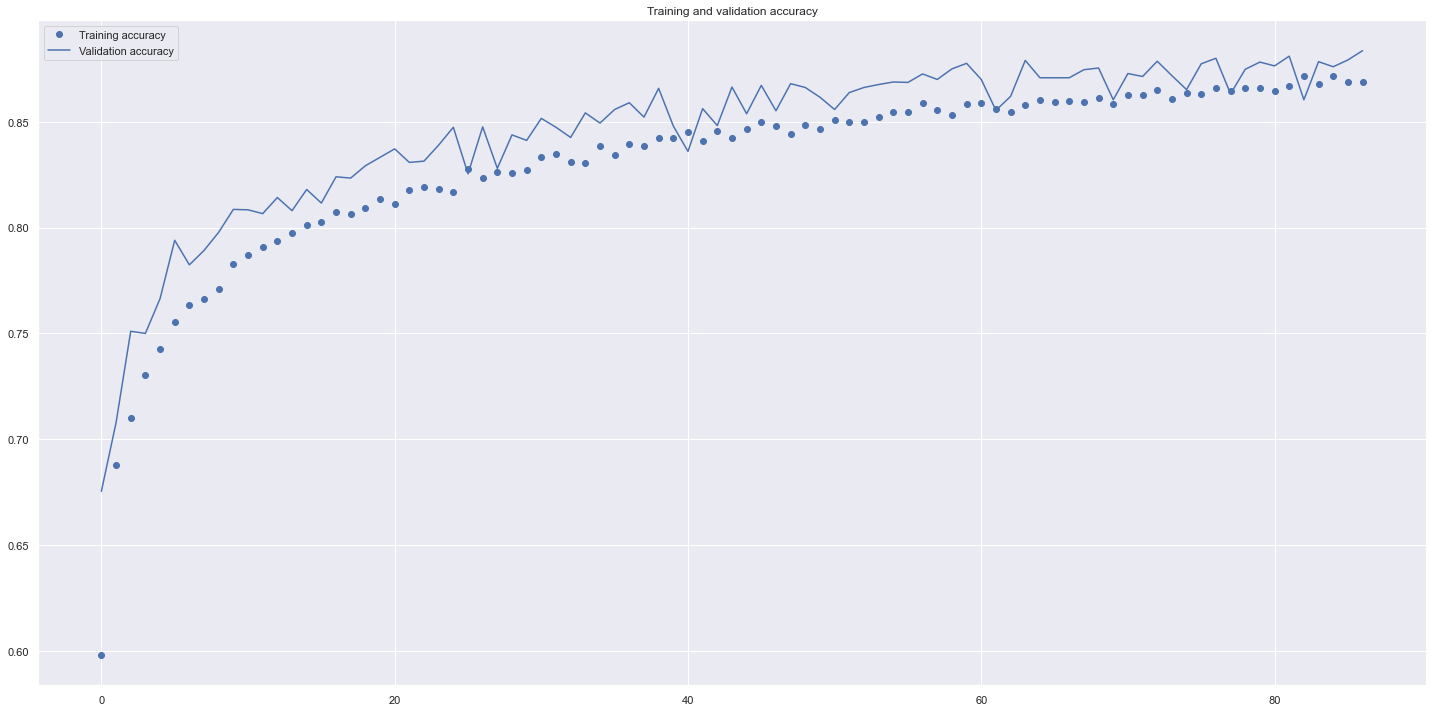

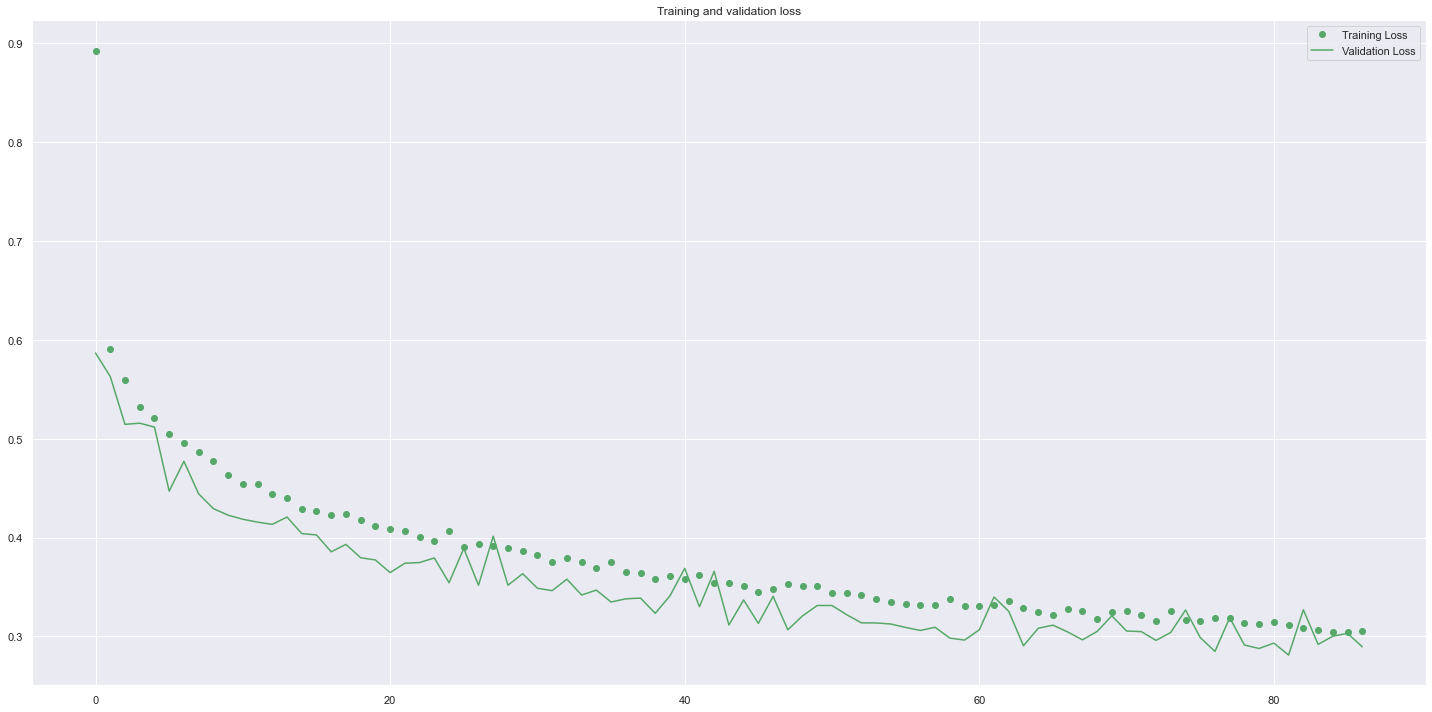

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[](http://)

In [ ]:
model.save('../dogs_vs_cats/models/sig/model_dog_cat')

INFO:tensorflow:Assets written to: ../dogs_vs_cats/models/sig/model_dog_cat\assets


In [ ]:
model = keras.models.load_model('../dogs_vs_cats/models/sig/model_dog_cat')



<a id="9"></a> <br>
# 9 Predict the Results

In [ ]:
test_loss, test_acc = model.evaluate(test_datagenerator, steps=len(test_datagenerator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

34/34 [==============================] - 7s 203ms/step - loss: 0.2896 - accuracy: 0.8836
Loss: 28.955
Accuracy: 88.360


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(150, 150))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 150, 150, 3)
    # center pixel data
    #img = img.astype('float32')
    #img = img - [123.68, 116.779, 103.939]
    return img

img = load_image("../dogs_vs_cats/train/cat.1.jpg")
result = model.predict(img)
result

array([[0.]], dtype=float32)

In [ ]:
predictions = model.predict(x=test_datagenerator, steps= len(test_datagenerator), verbose=0)

In [ ]:
test_datagenerator.classes

[1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,


In [ ]:
cm = confusion_matrix(y_true=test_datagenerator.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')




<a id="10"></a> <br>
# 10 confusion Matrix Plot


Confusion matrix, without normalization
[[2496    0]
 [2504    0]]


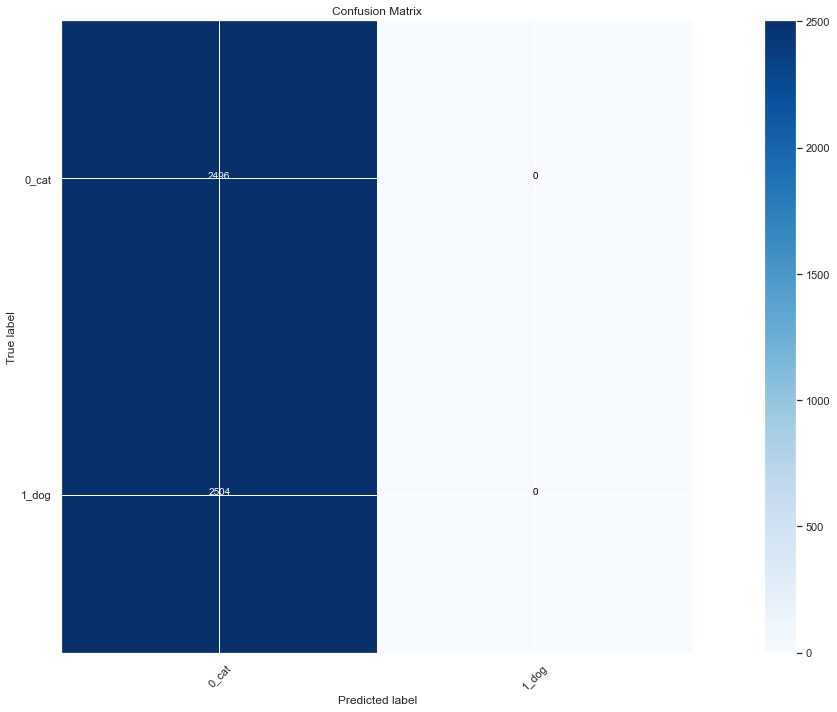

In [ ]:
cm_plot_labels = ['0_cat', '1_dog']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')